In [1]:
import numpy as np
import scipy.sparse as sp
np.random.seed()

L = 50

states = np.random.choice([-1,1],size=(10000,L))
print (states.shape)

(10000, 50)


In [2]:
def ising_energies(states):
    L = states.shape[1]
    J = np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L] = -1.0
    E = np.einsum('...i,ij,...j->...',states,J,states)
    return E

energies = ising_energies(states)

In [3]:
states = np.einsum('...i,...j->...ij',states,states)
shape = states.shape
print (shape)
states = states.reshape((shape[0],shape[1]*shape[2]))
Data = [states,energies]

(10000, 50, 50)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(Data[0],Data[1],test_size=0.2)

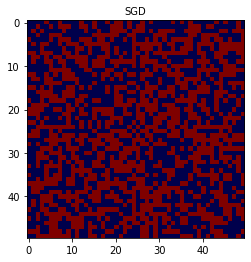

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn

n_epoch = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return (t0/(t1+t))

J = np.random.randn(L*L,1)

for epoch in range(n_epoch):
    for i in range(10000):
        random_index = np.random.randint(10000)
        xi = Data[0][random_index:random_index+1]
        yi = Data[1][random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(J)-yi)
        eta = learning_schedule(epoch*10000+i)
        J = J - eta*gradients

J_new = np.array(J).reshape((L,L))


cmap_args = dict(vmin=-1.0, vmax=1.0, cmap='seismic')

plt.imshow(J_new,**cmap_args)
plt.title('SGD',fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

In [40]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train,y_train.ravel())

print (sgd_reg.intercept_, sgd_reg.coef_)
print (sgd_reg.intercept_.shape, sgd_reg.coef_.shape)



[1.96795166e+09] [ 1.96795166e+09  1.87725307e+09 -3.91730852e+10 ...  5.38083182e+10
 -6.75576118e+10  1.96795166e+09]
(1,) (2500,)


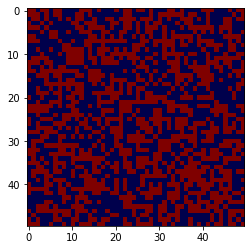

In [43]:
J = np.array(sgd_reg.coef_).reshape((L,L))
plt.imshow(J,**cmap_args)


In [45]:


print (np.linalg.norm(J-J_new))

inf
